In [169]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Expected value after 10000 trials = 99.5844
Average cans per grid instance = 70.0425
Total probability (must be 1) = 1.0
Min turns in samples = 94


Text(0.5, 0, 'k')

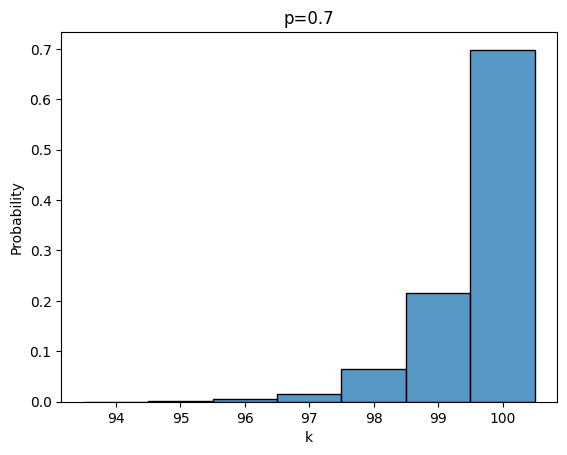

In [170]:
rnd = np.random.default_rng()

num_samples = 10000
L = 10
N = L*L

samples = np.zeros(num_samples, dtype=np.int32)

tt = 0
p = 0.7

for i in range(num_samples): # Do `num_samples` trials

    grid = rnd.choice((True, False), size=N, p=[p, 1-p]) # Grid with 50% chance of having can
    total_cans = np.sum(grid)                    # Total cans in grid 
    tt += total_cans
    indices = np.arange(0, N, 1, dtype=np.int32) # Grid indices
    rnd.shuffle(indices)                             # Shuffle grid indices
    caught_cans = 0
    steps_to_catch_all_cans = 0
    for idx in indices: # Go over each index (indices are shuffled)
        steps_to_catch_all_cans += 1
        if grid[idx]:        # Is there a can in this grid cell?
            caught_cans += 1 # If so, increment number of caught cans
            if caught_cans == total_cans: # Exit loop if all cans are caught
                break
    samples[i] = steps_to_catch_all_cans # Keep record of how many steps it took to catch all cans

print(f"Expected value after {num_samples} trials = {np.mean(samples)}") # Display expected value
print(f"Average cans per grid instance = {tt / num_samples}")
hist_np = np.histogram(samples, N, (0.5, N + 0.5))[0]
probabilities =  hist_np / num_samples
print(f"Total probability (must be 1) = {np.sum(probabilities)}")
print(f"Min turns in samples = {np.min(samples)}")
ax = sns.histplot(samples, stat='probability', discrete=True, kde=False, kde_kws={'bw_adjust':2}); # Show distribution
ax.set_title(f"p={p}")
ax.set_xlabel("k")

#_, ax = plt.subplots()
#ax.bar(np.arange(87, 101, 1), probabilities[86:])
#ax.set_title(f"p={p}")

#ax.bar(np.arange(87, 101, 1), hist_np[86:]);

#probabilities[80:]

Sum of probabilities (should be 1) = 1.0
Expected value (p=0.7) = 99.57142857142858


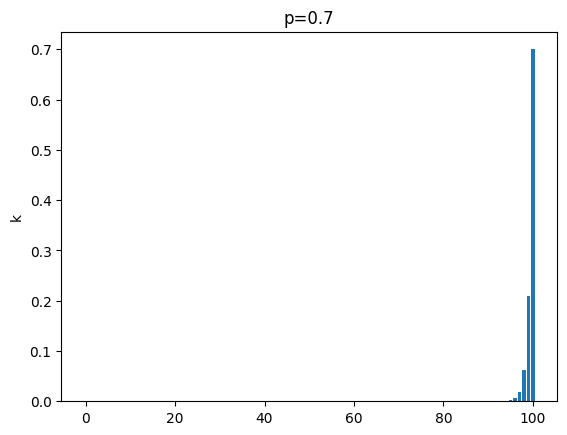

In [171]:
# This seems to give us the cumulative probability
def p_whuber_cum(p, N, k):
    return np.power(1 - p, N - k)

p_whuber_cum_v = np.vectorize(p_whuber_cum, excluded=['p', 'N'])

ks = np.arange(0, 101, 1)

z = p_whuber_cum_v(p, N, ks)

# Inverse cumsum, will give us the individual probabilities
z[1:] -= z[:-1]

_, ax = plt.subplots()
ax.bar(ks, z)
ax.set_title(f"p={p}")
ax.set_ylabel("Probability")
ax.set_ylabel("k")

print(f"Sum of probabilities (should be 1) = {np.sum(z)}")
print(f"Expected value (p={p}) = {np.sum(ks * z)}")

#print(z)

Sum of probabilities (should be 1) = 1.0
Expected value (p=0.7) = 99.76923076923136


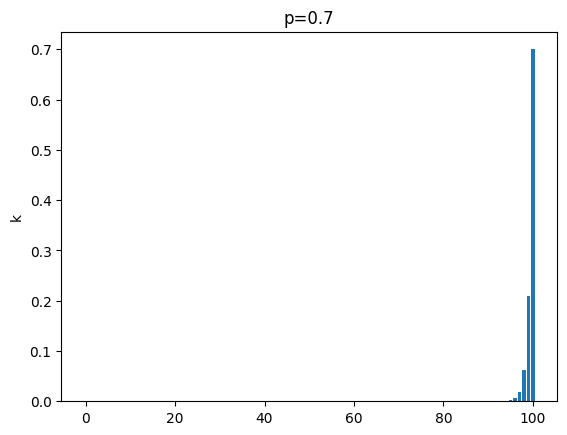

In [188]:
def p_whuber(p, N, k):
    #return np.power(1 - p, N - k) - np.power(1 - p, N - (k - 1))
    return p * np.power(1 - p, N - k)

p_whuber_v = np.vectorize(p_whuber, excluded=['p', 'N'])

def ev_whuber(p, N):
    ks = np.arange(0, N+1, 1)
    z = p_whuber_v(p, N, ks)
    return np.sum(ks * z)

def ev_whuber_alt(p, N):
    ks = np.arange(0, N+1, 1)
    return p * np.power(1 - p, N) * np.sum(ks * np.power(1-p,-ks))

def argeo_sum(r, N):
    return (-r-(-1+N)*np.power(r,N+1))/(1-r) + (r*r*(1-np.power(r,N)))/(1-r*r)

ev_whuber_v = np.vectorize(ev_whuber, excluded=['N'])
ev_whuber_alt_v = np.vectorize(ev_whuber_alt, excluded=['N'])
argeo_sum_v = np.vectorize(argeo_sum, excluded=['N'])

def ev_whuber_alt2(p, N):
    ks = np.arange(0, N+1, 1)
    return p * np.power(1 - p, N) * argeo_sum(1/(1-p), N)

ks = np.arange(0, N+1, 1)

_, ax = plt.subplots()
ax.bar(ks, p_whuber_v(p, N, ks))
ax.set_title(f"p={p}")
ax.set_ylabel("Probability")
ax.set_ylabel("k")

print(f"Sum of probabilities (should be 1) = {np.sum(z)}")
print(f"Expected value (p={p}) = {ev_whuber_alt2(p, N)}")
#print(z)



In [173]:
# Calculate expected values for various values of p between 0 and 1

rnd = np.random.default_rng()

num_samples = 5000
L = 10
N = L * L

can_prob = np.linspace(0, 1, 101)
exp_values = np.zeros(can_prob.shape)

for cp_i in range(len(can_prob)):
    #print(can_prob[cp_i]*L*L)
    samples = np.zeros(num_samples, dtype=np.int32)
    for i in range(num_samples): # Do `num_samples` trials

        grid = rnd.choice((True, False), size=L * L,p=[can_prob[cp_i], 1 - can_prob[cp_i]]) # Grid with 50% chance of having can
        
        #grid = np.zeros(L * L, dtype=bool)
        #grid[0:int(np.round(can_prob[cp_i]*L*L))] = True
        
        total_cans = np.sum(grid)                    # Total cans in grid 
        #print(total_cans)
        indices = np.arange(0, L * L, 1, dtype=np.int32) # Grid indices
        rnd.shuffle(indices)                             # Shuffle grid indices
        #print(indices)
        caught_cans = 0
        steps_to_catch_all_cans = 0
        for idx in indices: # Go over each index (indices are shuffled)
            if caught_cans == total_cans: # Exit loop if all cans are caught
                break
            steps_to_catch_all_cans += 1
            if grid[idx]:        # Is there a can in this grid cell?
                caught_cans += 1 # If so, increment number of caught cans
        samples[i] = steps_to_catch_all_cans # Keep record of how many steps it took to catch all cans
    exp_values[cp_i] = np.mean(samples)


In [174]:
# Cross-validated function by Hunaphu
def ev_hunaphu(p, N):
    return N + (np.power(1 - p, N + 1) - (1 - p)) / p

ev_hunaphu_v = np.vectorize(ev_hunaphu, excluded=['N'])

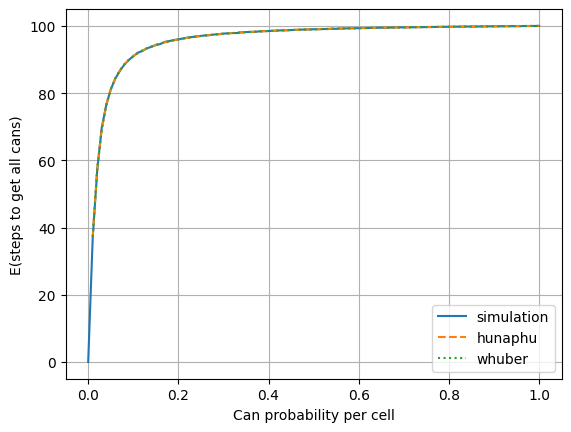

In [181]:
ax = plt.subplot()
ax.plot(can_prob, exp_values, label='simulation')
ax.grid()
#ax.plot(can_prob, (N+1)*can_prob*N/(can_prob*N + 1), label='hypergeom')
#ax.plot(can_prob[1:], (N * can_prob[1:] + np.power(1 - can_prob[1:], N + 1) + can_prob[1:] - 1) / can_prob[1:], label='hypergeom') # GOOD ONE!
#ax.plot(can_prob[1:], N + (np.power(1 - can_prob[1:], N + 1) - (1 - can_prob[1:])) / can_prob[1:], label='cross-validated formula') # ALSO GOOD!
ax.plot(can_prob[1:], ev_hunaphu_v(can_prob[1:], N), label='hunaphu', linestyle='dashed') # ALSO GOOD!
ax.plot(can_prob[1:], ev_whuber_v(can_prob[1:], N), label='whuber', linestyle='dotted')

ax.set_xlabel('Can probability per cell')
ax.set_ylabel('E(steps to get all cans)')
ax.legend()

In [176]:
ev_hunaphu(p, N)

99.57142857142857

0.42857142857142866

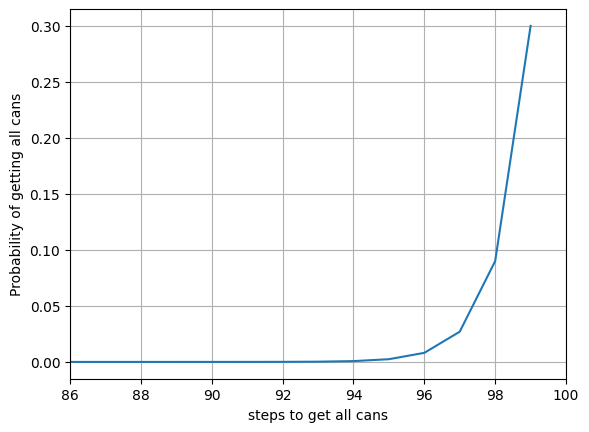

In [177]:
trials = np.arange(0, N, 1)
p = 0.7
ax = plt.subplot()
ax.plot(trials, np.power(1-p, N-trials), label='simulation')
ax.set_xlim((86, 100))
ax.set_xlabel('steps to get all cans')
ax.set_ylabel('Probability of getting all cans')
ax.grid()
np.sum(np.power(1-p, N-trials))

In [178]:
print(trials)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95
 96 97 98 99]


In [179]:
ev = 0
p = 0.5
for i in range(len(trials)):
    ev += (trials[i]+1) * np.power(1-p, N - trials[i])

print(f"Expected value = {ev}")

Expected value = 99.0


In [180]:
# for i in range(len(trials)):
#     print(np.power(1/p, trials[i]-N))
p = 0.7
np.sum(np.power(1-p, N - trials))

0.42857142857142866